In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'Bangalore_1990_2022_BangaloreCity.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')

# Fill missing values in 'tavg', 'tmin', 'tmax', and 'prcp' with the mean of their respective columns
data['tavg'].fillna(data['tavg'].mean(), inplace=True)
data['tmin'].fillna(data['tmin'].mean(), inplace=True)
data['tmax'].fillna(data['tmax'].mean(), inplace=True)
data['prcp'].fillna(data['prcp'].mean(), inplace=True)

# Extract year, month, and day as additional features
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

# Select relevant features and target variable
features = ['tavg', 'tmin', 'tmax', 'prcp', 'year', 'month', 'day']
target = 'tavg'

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
data[features] = scaler.fit_transform(data[features])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the data for LSTM
# Use the previous 30 days to predict the next day's average temperature
sequence_length = 30

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length][features].values
        label = data.iloc[i + sequence_length][target]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)
print(f'Predictions: {predictions[:5]}')

Epoch 1/20


C:\Users\Tarunkumar k\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.0254 - val_loss: 0.0083
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0080 - val_loss: 0.0055
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0074 - val_loss: 0.0049
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 0.0063 - val_loss: 0.0046
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0056 - val_loss: 0.0041
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 0.0055 - val_loss: 0.0041
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 9/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 10/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0049 - val_loss: 0.0034
Epoch 11/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 12/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1

In [7]:
print(f'Predictions: {predictions[:5]} {y_test[:5]}')

Predictions: [[0.43863988]
 [0.47860277]
 [0.5482758 ]
 [0.59409666]
 [0.6502274 ]] [0.5        0.59210526 0.63815789 0.70394737 0.57236842]


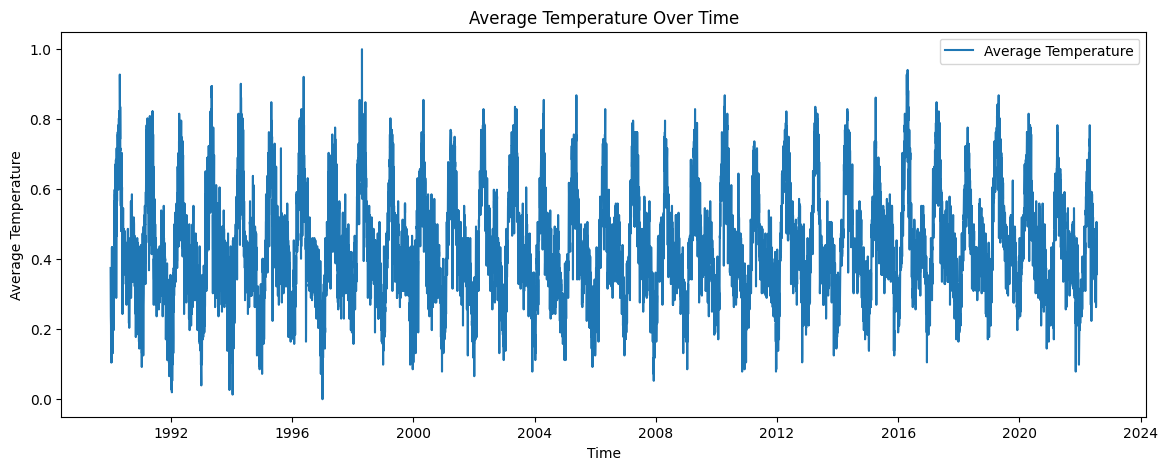

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(data['time'], data['tavg'], label='Average Temperature')
plt.xlabel('Time')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time')
plt.legend()
plt.show()

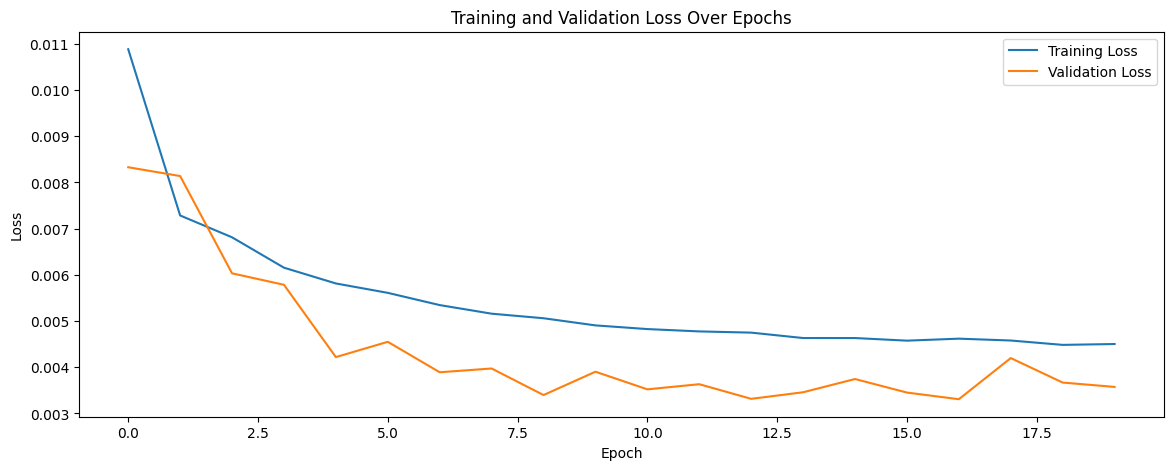

In [4]:
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'Bangalore_1990_2022_BangaloreCity.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')

# Fill missing values in 'tavg', 'tmin', 'tmax', and 'prcp' with the mean of their respective columns
data['tavg'].fillna(data['tavg'].mean(), inplace=True)
data['tmin'].fillna(data['tmin'].mean(), inplace=True)
data['tmax'].fillna(data['tmax'].mean(), inplace=True)
data['prcp'].fillna(data['prcp'].mean(), inplace=True)

# Extract year, month, and day as additional features
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

# Select relevant features and target variable
features = ['tavg', 'tmin', 'tmax', 'prcp', 'year', 'month', 'day']
target = 'tavg'

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
data[features] = scaler.fit_transform(data[features])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the data for LSTM/BiLSTM
# Use the previous 30 days to predict the next day's average temperature
sequence_length = 60

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length][features].values
        label = data.iloc[i + sequence_length][target]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features)))),
    Dropout(0.4),
    Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.4),
    Dense(30, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)
print(f'Predictions: {predictions[:5]}')


Epoch 1/20


C:\Users\Tarunkumar k\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 131ms/step - loss: 0.0201 - val_loss: 0.0081
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 30s 125ms/step - loss: 0.0079 - val_loss: 0.0046
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - loss: 0.0062 - val_loss: 0.0045
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 31s 129ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 31s 129ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - loss: 0.0052 - val_loss: 0.0038
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 30s 125ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 9/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 10/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - loss: 0.0049 - val_loss: 0.0035
Epoch 11/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 12/20


In [4]:
print(f'Predictions: {predictions[:5]},{y_test[:5]}')

Predictions: [[0.7044852 ]
 [0.7062548 ]
 [0.72900724]
 [0.7381782 ]
 [0.6816798 ]],[0.76315789 0.79605263 0.81578947 0.78947368 0.78289474]


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
file_path = 'Bangalore_1990_2022_BangaloreCity.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')

# Fill missing values in 'tavg', 'tmin', 'tmax', and 'prcp' with the mean of their respective columns
data['tavg'].fillna(data['tavg'].mean(), inplace=True)
data['tmin'].fillna(data['tmin'].mean(), inplace=True)
data['tmax'].fillna(data['tmax'].mean(), inplace=True)
data['prcp'].fillna(data['prcp'].mean(), inplace=True)

# Extract year, month, and day as additional features
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

# Select relevant features and target variable
features = ['tavg', 'tmin', 'tmax', 'prcp', 'year', 'month', 'day']
target = 'tavg'

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
data[features] = scaler.fit_transform(data[features])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the data for LSTM
# Use the previous 30 days to predict the next day's average temperature
sequence_length = 30

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length][features].values
        label = data.iloc[i + sequence_length][target]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=2b0, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Rescale the predictions and true values back to original scale (since we used MinMaxScaler)
y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], y_test.reshape(-1, 1)], axis=1))[:, -1]
predictions_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], predictions], axis=1))[:, -1]

# Calculate additional metrics: MAE and R-squared
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

# Print some example predictions
print(f'Predictions (First 5): {predictions_rescaled[:5]}')
print(f'Actual values (First 5): {y_test_rescaled[:5]}')


C:\Users\Tarunkumar k\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 0.0262 - val_loss: 0.0066
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0082 - val_loss: 0.0058
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.0070 - val_loss: 0.0062
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 0.0065 - val_loss: 0.0052
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0062 - val_loss: 0.0044
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0059 - val_loss: 0.0043
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0053 - val_loss: 0.0037
Epoch 9/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.0050 - val_loss: 0.0035
Epoch 10/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0049 - val_loss: 0.0034
Epoch 11/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 12/20
238/238 ━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
file_path = 'Bangalore_1990_2022_BangaloreCity.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')

# Fill missing values in 'tavg', 'tmin', 'tmax', and 'prcp' with the mean of their respective columns
data['tavg'].fillna(data['tavg'].mean(), inplace=True)
data['tmin'].fillna(data['tmin'].mean(), inplace=True)
data['tmax'].fillna(data['tmax'].mean(), inplace=True)
data['prcp'].fillna(data['prcp'].mean(), inplace=True)

# Extract year, month, and day as additional features
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

# Select relevant features and target variable
features = ['tavg', 'tmin', 'tmax', 'prcp', 'year', 'month', 'day']
target = 'tavg'

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
data[features] = scaler.fit_transform(data[features])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the data for LSTM
# Use the previous 30 days to predict the next day's average temperature
sequence_length = 30

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length][features].values
        label = data.iloc[i + sequence_length][target]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Rescale the predictions and true values back to original scale (since we used MinMaxScaler)
y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], y_test.reshape(-1, 1)], axis=1))[:, -1]
predictions_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], predictions], axis=1))[:, -1]

# Calculate additional metrics: MAE and R-squared
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

# Define accuracy as the percentage of predictions within a certain tolerance (e.g., 5% of the actual values)
tolerance = 0.05  # 5% tolerance

def calculate_accuracy(y_true, y_pred, tolerance):
    within_tolerance = np.abs((y_pred - y_true) / y_true) <= tolerance
    return np.mean(within_tolerance) * 100  # Return as a percentage

# Calculate accuracy
accuracy = calculate_accuracy(y_test_rescaled, predictions_rescaled, tolerance)
print(f'Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%')

# Print some example predictions
print(f'Predictions (First 5): {predictions_rescaled[:5]}')
print(f'Actual values (First 5): {y_test_rescaled[:5]}')


Epoch 1/30


C:\Users\Tarunkumar k\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0341 - val_loss: 0.0060
Epoch 2/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - loss: 0.0087 - val_loss: 0.0059
Epoch 3/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 0.0072 - val_loss: 0.0053
Epoch 4/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 5/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0067 - val_loss: 0.0049
Epoch 6/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 7/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0061 - val_loss: 0.0053
Epoch 8/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 9/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 0.0056 - val_loss: 0.0039
Epoch 10/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0054 - val_loss: 0.0042
Epoch 11/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 12/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 